In [1]:
from sm_annotation_utils.sm_annotation_utils import SMInstance

In [2]:
# Provide a path to the main configuration file used by SM engine
sm_dev = SMInstance("/home/lomereiter/github/sm-engine/conf/config_dev_metasp_eu.json")

datasets = sm_dev.datasets()
print len(datasets)

92


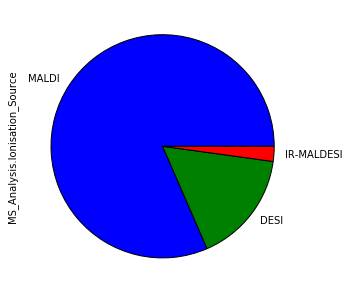

In [3]:
# Plot a pie chart of ionisation sources used

# JSON schema is available at https://github.com/SpatialMetabolomics/maori-upload/blob/master/webapp/static/schema.json
%matplotlib inline
sm_dev.metadata(datasets)['MS_Analysis.Ionisation_Source'].value_counts().plot(kind='pie', figsize=(5, 5))

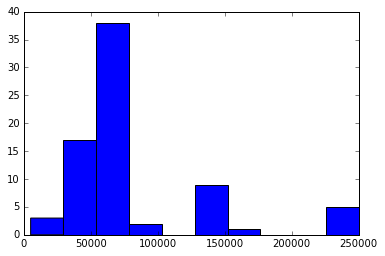

In [4]:
import matplotlib.pyplot as plt

# Get metadata for a subset of all datasets, e.g. for all with MALDI source

maldi_datasets = [d for d in datasets if d.metadata.json['MS_Analysis']['Ionisation_Source'] == 'MALDI']
maldi_meta = sm_dev.metadata(maldi_datasets)

# In this example we plot a histogram of resolving power at m/z=800 for MALDI datasets

rps = maldi_meta['MS_Analysis.Detector_Resolving_Power.Resolving_Power']
mzs = maldi_meta['MS_Analysis.Detector_Resolving_Power.mz']
analyzers = maldi_meta['MS_Analysis.Analyzer']

# currently three simple instrument models are supported (FTICR, Orbitrap, TOF)
from cpyMSpec import InstrumentModel

rp800s = []
for rp, mz, analyzer in zip(rps, mzs, analyzers):
    kind = str(analyzer.lower())
    if kind not in ['fticr', 'orbitrap']:
        kind = 'tof'
    instr = InstrumentModel(kind, rp, mz)
    rp800s.append(instr.resolvingPowerAt(800))

plt.hist(rp800s);